In [1]:
%matplotlib inline

# Import libraries to run SITHCON


In [2]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_context("poster")

import torch
from torch import nn as nn
ttype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
ctype = torch.cuda.LongTensor if torch.cuda.is_available() else torch.LongTensor
print(ttype)
import torch.nn.functional as F
from matplotlib import gridspec
from sithcon import SITHCon_Layer, _SITHCon_Core, iSITH

from tqdm.notebook import tqdm

import itertools
from csv import DictWriter
import os
from os.path import join
import glob

import numpy as np
import pandas as pd
import pickle
from math import factorial
import random

<class 'torch.cuda.FloatTensor'>


# Mount Drive

In [3]:
import librosa
import numpy as np
import zipfile

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Unzip dataset

In [4]:
zip_file_path = '/content/drive/MyDrive/remake.zip'


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

# Audio data preprocessing and feature extraction


# Scaling the audio files by resampling


In [10]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
labels = []
delimiter = "-"
spectrograms = []


def scale_audio(input_folder,scale):
    for filename in os.listdir(input_folder):
      if filename.endswith(".wav"):
        wav_path = os.path.join(input_folder, filename)
        y, sr = librosa.load(wav_path,sr=None)
        resample_rate = sr*scale
        y = librosa.resample(y, orig_sr=sr, target_sr=resample_rate)
        D = librosa.stft(y)
        log_D = librosa.amplitude_to_db(abs(D))
        log_D = log_D[:50, :250]
        log_D = np.pad(log_D,((0,0), (0,250 - log_D.shape[1])))
        spectrograms.append(log_D)
        label = filename.split(delimiter)[3]
        labels.append(int(label))

def generate_data():

  output_folder = 'myDataFiles'
  os.makedirs(output_folder, exist_ok=True)


  list_folders = ['remake/0','remake/1','remake/2','remake/3','remake/4','remake/5','remake/6']
  #list_folders = ['remake/0']
  scales = [10.00, 5.00, 2.50, 1.25, 1, .8, .4, .2, .1]

  for scale in scales:
    for folder in list_folders:
      scale_audio(folder, scale)
    # Generate test and train sets for each scale
    X = np.array(spectrograms)
    y = np.array(labels)
    trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Scale : ", scale, "trainX shape : ", trainX.shape)

    my_trainX_name = 'trainX'+str(scale)+'.npy'
    my_trainY_name = 'trainY'+str(scale)+'.npy'
    my_testX_name = 'testX'+str(scale)+'.npy'
    my_testY_name = 'testY'+str(scale)+'.npy'

    np.save(join(output_folder,my_trainX_name),trainX)
    np.save(join(output_folder,my_testX_name),testX)
    np.save(join(output_folder,my_trainY_name),trainY)
    np.save(join(output_folder,my_testY_name),testY)
    # Clear Elements in the spectrogrms and labels array
    spectrograms.clear()
    labels.clear()

generate_data()








Scale :  10.0 trainX shape :  (1548, 50, 250)
Scale :  5.0 trainX shape :  (1548, 50, 250)
Scale :  2.5 trainX shape :  (1548, 50, 250)
Scale :  1.25 trainX shape :  (1548, 50, 250)
Scale :  1 trainX shape :  (1548, 50, 250)
Scale :  0.8 trainX shape :  (1548, 50, 250)
Scale :  0.4 trainX shape :  (1548, 50, 250)
Scale :  0.2 trainX shape :  (1548, 50, 250)


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1784
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1434
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1821
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1468
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1810
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1707
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py

Scale :  0.1 trainX shape :  (1548, 50, 250)


# Vizualize some features for a random audio file

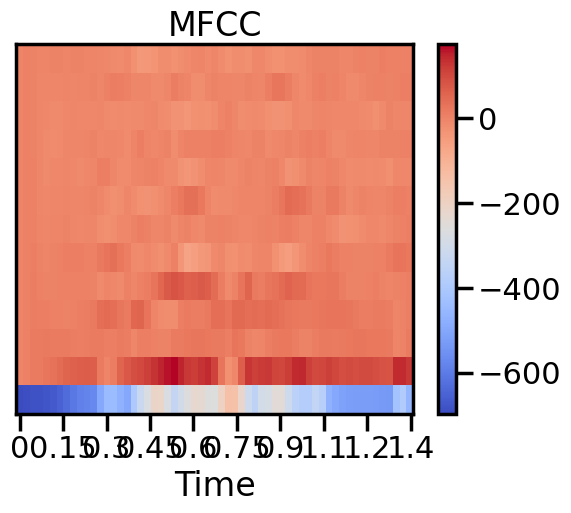

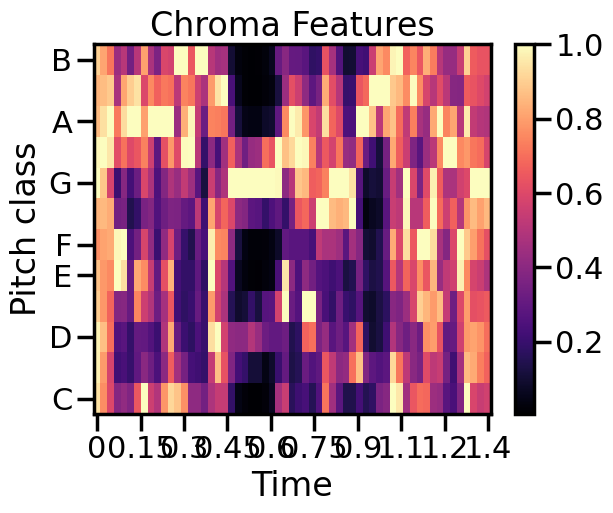

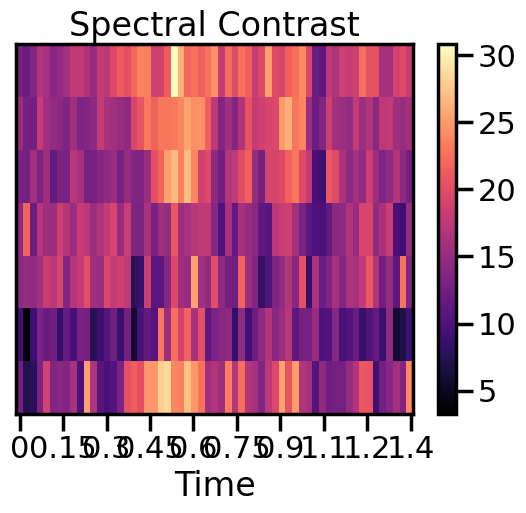

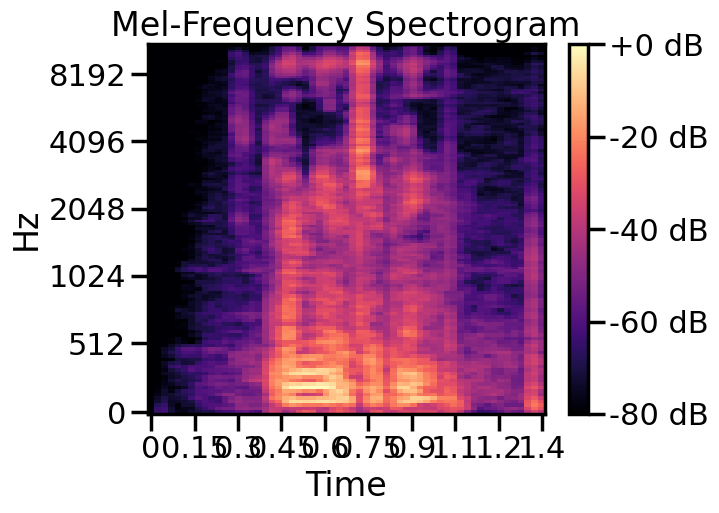

In [24]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import os

file_path = '/content/remake/1/101-m-20-1-0-21.wav'

signal, sr = librosa.load(file_path, sr=None)
mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
chroma = librosa.feature.chroma_stft(y=signal, sr=sr)
contrast = librosa.feature.spectral_contrast(y=signal, sr=sr)
melspectrogram = librosa.feature.melspectrogram(y=signal, sr=sr)
spectral_contrast = librosa.feature.spectral_contrast(y=signal, sr=sr)
spectral_centroid = librosa.feature.spectral_centroid(y=signal, sr=sr)
zero_crossing_rate = librosa.feature.zero_crossing_rate(y=signal)

librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()
print()
print()

librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma Features')
plt.show()
print()
print()

librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.title('Spectral Contrast')
plt.show()
print()
print()

librosa.display.specshow(librosa.power_to_db(melspectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Frequency Spectrogram')
plt.show()
print()
print()


#Download created files

In [21]:
from google.colab import files


!zip -r myDataFiles.zip /content/myDataFiles

files.download('myDataFiles.zip')

  adding: content/myDataFiles/ (stored 0%)
  adding: content/myDataFiles/trainX1.25.npy (deflated 77%)
  adding: content/myDataFiles/testY2.5.npy (deflated 87%)
  adding: content/myDataFiles/testX5.0.npy (deflated 27%)
  adding: content/myDataFiles/testX0.4.npy (deflated 92%)
  adding: content/myDataFiles/testY0.8.npy (deflated 87%)
  adding: content/myDataFiles/testY0.1.npy (deflated 87%)
  adding: content/myDataFiles/trainY0.2.npy (deflated 90%)
  adding: content/myDataFiles/trainY2.5.npy (deflated 90%)
  adding: content/myDataFiles/testY0.2.npy (deflated 87%)
  adding: content/myDataFiles/trainX1.npy (deflated 82%)
  adding: content/myDataFiles/trainX0.8.npy (deflated 85%)
  adding: content/myDataFiles/testX1.25.npy (deflated 77%)
  adding: content/myDataFiles/testX2.5.npy (deflated 57%)
  adding: content/myDataFiles/testX0.1.npy (deflated 98%)
  adding: content/myDataFiles/trainX2.5.npy (deflated 57%)
  adding: content/myDataFiles/trainY10.0.npy (deflated 90%)
  adding: content/myD

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
batch_size = 16
# Train the SITHCON model with dataset containing no scaled samples
output_folder = 'myDataFiles'
trainX = np.load(join(output_folder,'trainX1.npy'))
trainY = np.load(join(output_folder,'trainY1.npy'))
testX = np.load(join(output_folder,'testX1.npy'))
testY = np.load(join(output_folder,'testY1.npy'))

dataset = torch.utils.data.TensorDataset(torch.Tensor(trainX).cuda(),
                                         torch.LongTensor(trainY).cuda())
dataset = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

dataset_valid = torch.utils.data.TensorDataset(torch.Tensor(testX).cuda(),
                                               torch.LongTensor(testY).cuda())
dataset_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_size, shuffle=False)

# CLASSES

In [13]:
class SITHCon_Classifier(nn.Module):
    def __init__(self, out_classes, layer_params,
                 act_func=nn.ReLU, batch_norm=False,
                 dropout=.2):
        super(SITHCon_Classifier, self).__init__()
        last_channels = layer_params[-1]['channels']
        self.transform_linears = nn.ModuleList([nn.Linear(l['channels'], l['channels'])
                                                for l in layer_params])
        self.sithcon_layers = nn.ModuleList([SITHCon_Layer(l, act_func) for l in layer_params])
        self.to_out = nn.Linear(last_channels, out_classes)


    def forward(self, inp):

        x = inp
        #out = []
        for i in range(len(self.sithcon_layers)):
            x = self.sithcon_layers[i](x)

            x = F.relu(self.transform_linears[i](x[:,0,:,:].transpose(1,2)))
            x = x.unsqueeze(1).transpose(2,3)

            #out.append(x.clone())
        x = x.transpose(2,3)[:, 0, :, :]
        #x = x.transpose(2,3)[:, 0, :, :]
        x = self.to_out(x)
        return x

In [14]:
def gen_model(p):
    sp1 = dict(in_features=50,
               tau_min=.1, tau_max=4000, buff_max=6500,
               dt=1, ntau=p[0], k=p[1], g=0.0, ttype=ttype,
               channels=35, kernel_width=p[2], dilation=p[3])
    sp2 = dict(in_features=sp1['channels'],
               tau_min=.1, tau_max=4000, buff_max=6500,
               dt=1, ntau=p[0], k=p[1], g=0.0, ttype=ttype,
               channels=35, kernel_width=p[2], dilation=p[3])
    sp3 = dict(in_features=sp2['channels'],
               tau_min=.1, tau_max=4000, buff_max=6500,
               dt=1, ntau=p[0], k=p[1], g=0.0, ttype=ttype,
               channels=35, kernel_width=p[2], dilation=p[3])
    layer_params = [sp1, sp2]# sp3]
    model = SITHCon_Classifier(10, layer_params, act_func=nn.ReLU,#nn.ReLU
                              ).cuda()
    return model

def train(model, ttype, train_loader, test_loader, optimizer, loss_func, epoch, perf_file,
          loss_buffer_size=100, batch_size=4, device='cuda',
          prog_bar=None, last_test_perf=0):

    assert(loss_buffer_size%batch_size==0)
    perfs = []
    losses = []
    best_test_perf = last_test_perf

    for batch_idx, (data, target) in enumerate(train_loader):
        model.train()
        data = data.to(device).unsqueeze(1)
        target = target.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = loss_func(out[:, -1, :],
                         target)

        loss.backward()
        optimizer.step()
        perfs.append((torch.argmax(out[:, -1, :], dim=-1) ==
                      target).sum().item())
        perfs = perfs[int(-loss_buffer_size/batch_size):]

        losses.append(loss.detach().cpu().numpy())
        losses = losses[int(-loss_buffer_size/batch_size):]

        if ((batch_idx*batch_size)%loss_buffer_size == 0) & (batch_idx != 0):
            loss_track = {}
            #last_test_perf = test_model(model, 'cuda', test_loader,
            #                            batch_size)
            loss_track['avg_loss'] = np.mean(losses)
            #loss_track['last_test'] = last_test_perf
            loss_track['training_perf'] = np.mean(perfs) / (batch_size)
            loss_track['epoch'] = epoch
            loss_track['batch_idx'] = batch_idx
            last_test_perf =  np.mean(perfs) / (batch_size)
            with open(perf_file, 'a+') as fp:
                csv_writer = DictWriter(fp, fieldnames=list(loss_track.keys()))
                if fp.tell() == 0:
                    csv_writer.writeheader()
                csv_writer.writerow(loss_track)
                fp.flush()
            if best_test_perf < last_test_perf:
                torch.save(model.state_dict(), perf_file[:-4]+".pt")
                best_test_perf = last_test_perf
        if not (prog_bar is None):
            # Update progress_bar
            s = "{}:{} Loss: {:.5f}, Tperf: {:.4f}, valid: {:.4f}"
            format_list = [epoch,batch_idx*batch_size, np.mean(losses),
                           np.mean(perfs) / (batch_size),
                           last_test_perf]
            s = s.format(*format_list)
            prog_bar.set_description(s)
    return best_test_perf
def test_model(model, device, test_loader, batch_size):
    # Test the Model
    perfs = []
    tot = 0.0
    total_num = 0.0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.to(device).unsqueeze(1)
            batch = data.shape[0]
            target = target.to(device)
            out = model(data)
            total_num += batch
            tot += (torch.argmax(out[:, -1, :],
                                 dim=-1) == target).sum().item()

    perf = tot / total_num
    return perf

def save_outcome(outcome, filename):
    dat = pd.DataFrame(outcome)
    dat.to_csv(join('perf',filename))

In [15]:
params = [
          [400, 35, 23, 2],
          ]
model = gen_model(params[0])

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


In [18]:


runs = 1
for r in range(runs):
    for i, p in enumerate(params):
        best_test_perf = -1
        model = gen_model(p)

        tot_weights = 0
        for p in model.parameters():
            tot_weights += p.numel()
        print("Total Weights:", tot_weights)

        loss_func = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters())
        epochs = 100
        Trainscale = 10
        device='cuda'
        progress_bar = tqdm(range(int(epochs)), bar_format='{l_bar}{bar:5}{r_bar}{bar:-5b}')
        epochperfs = []
        times_100 = 0
        for epoch_idx in progress_bar:
            perfs = []
            losses = []
            model.train()
            best_test_perf = train(model, ttype, dataset, dataset_valid,
                                  optimizer, loss_func, batch_size=batch_size, loss_buffer_size=992,
                                  epoch=epoch_idx, perf_file=join('perf','sithcon_arabic_{}.csv'.format(r)),
                                  prog_bar=progress_bar, last_test_perf=best_test_perf)

Total Weights: 71515


/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


  0%|     | 0/100 [00:00<?, ?it/s]     

# Load the model trained on 1 scale


In [ ]:
model.load_state_dict(torch.load('perf/sithcon_arabic_0.pt'))

In [36]:
scales = [10.00, 5.00, 2.50, 1.25, 1, .8, .4, .2, .1]
scale_perf = []
x_vals = []
y_vals = []
for scale in scales:

  subj_perfs = []
  my_testX_name = 'testX'+str(scale)+'.npy'
  my_testY_name = 'testY'+str(scale)+'.npy'

  testX = np.load(join('./myDataFiles',my_testX_name))
  testY = np.load(join('./myDataFiles', my_testY_name))
  dataset_test = torch.utils.data.TensorDataset(torch.Tensor(testX).cuda(),
                                                       torch.LongTensor(testY).cuda())
  dataset_test = torch.utils.data.DataLoader(dataset_test, batch_size=2, shuffle=False)

  last_test_perf = test_model(model, 'cuda',
                                    dataset_test, batch_size=2)
  subj_perfs.append(last_test_perf)
  scoredict = {'perf':np.mean(subj_perfs),
                       'scal':float(scale)}
  x_vals.append(float(scale))
  y_vals.append(np.mean(subj_perfs))

  print(scoredict)


{'perf': 0.368305084745763, 'scal': 10.0}
{'perf': 0.6369999999999999, 'scal': 5.0}
{'perf': 0.9123333333333333, 'scal': 2.5}
{'perf': 0.9336666666666666, 'scal': 1.25}
{'perf': 0.9678983050847457, 'scal': 1}
{'perf': 0.94, 'scal': 0.8}
{'perf': 0.95, 'scal': 0.4}
{'perf': 0.9526666666666666, 'scal': 0.2}
{'perf': 0.9496666666666665, 'scal': 0.1}


# Visualization of Perfromance vs Scales

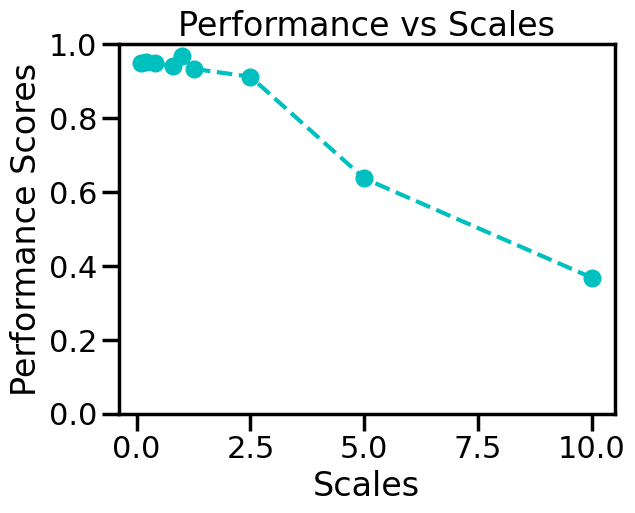

In [38]:

plt.ylim(0,1)
plt.plot(x_vals,y_vals,'o--', color = 'c')
plt.xlabel('Scales')
plt.ylabel('Performance Scores')
plt.title('Performance vs Scales')
plt.show()



